In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


In [2]:
df = pd.read_csv('../data/final/final_df.csv')

In [3]:
# vectorize x (TF-IDF)
vector = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=50000)
X = vector.fit_transform(df['processed_text'].astype(str))
y = df['label']

In [4]:
# split into sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [5]:
lr_model = LogisticRegression(max_iter=1000, C=1.0)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      3982
           1       0.85      0.81      0.83      4230

    accuracy                           0.83      8212
   macro avg       0.83      0.83      0.83      8212
weighted avg       0.83      0.83      0.83      8212



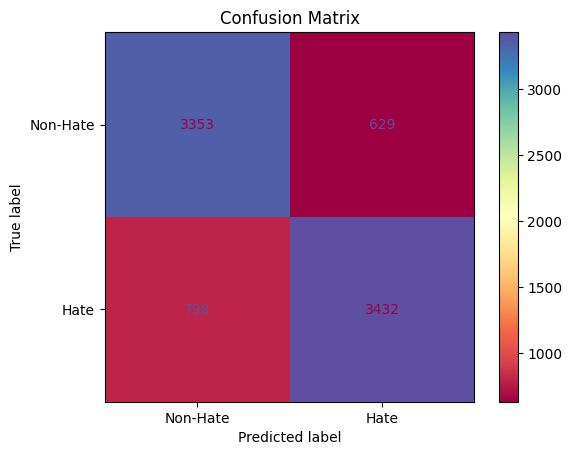

In [6]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Hate', 'Hate'])
disp.plot(cmap='Spectral', values_format='d', ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()


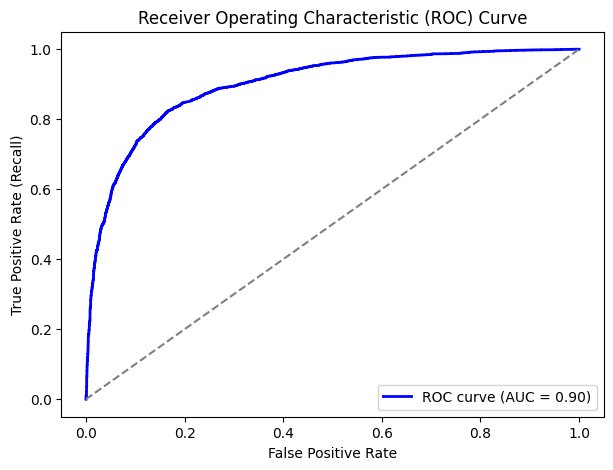

In [ ]:
y_prob = lr_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [8]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))


SVM Performance:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      3982
           1       0.85      0.81      0.83      4230

    accuracy                           0.83      8212
   macro avg       0.83      0.83      0.83      8212
weighted avg       0.83      0.83      0.83      8212



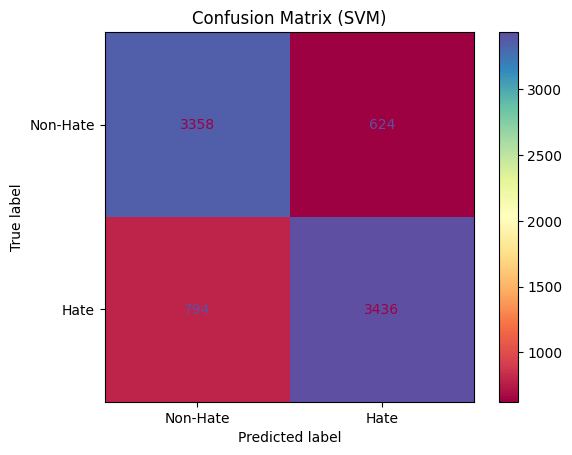

In [10]:

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Hate', 'Hate'])
disp.plot(cmap='Spectral', values_format='d', ax=plt.gca())
plt.title("Confusion Matrix (SVM)")
plt.show()


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Performance:\n", classification_report(y_test, y_pred_rf))


Random Forest Performance:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81      3982
           1       0.85      0.75      0.80      4230

    accuracy                           0.81      8212
   macro avg       0.81      0.81      0.81      8212
weighted avg       0.81      0.81      0.81      8212



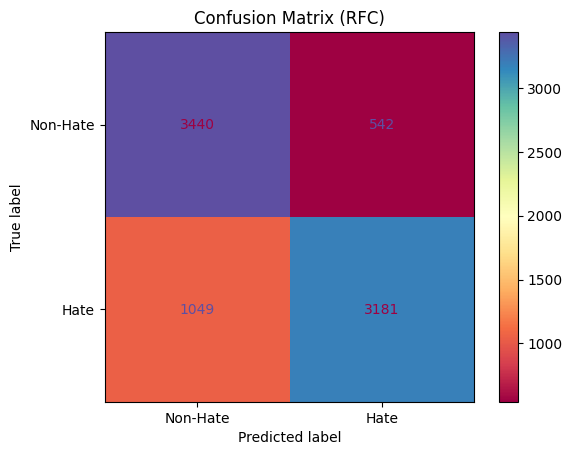

In [12]:

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Hate', 'Hate'])
disp.plot(cmap='Spectral', values_format='d', ax=plt.gca())
plt.title("Confusion Matrix (RFC)")
plt.show()


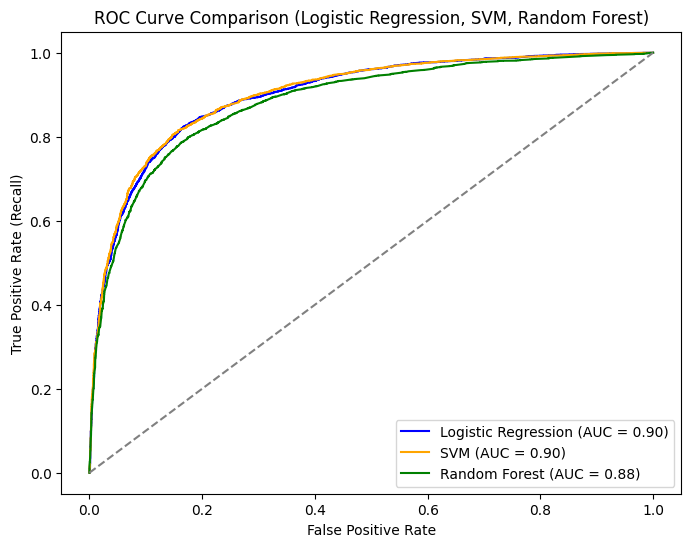

In [ ]:
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Logistic Regression
y_prob_svm = svm_model.decision_function(X_test)  # SVM (direct decision function)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Random Forest

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_lr = auc(fpr_lr, tpr_lr)
auc_svm = auc(fpr_svm, tpr_svm)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='orange')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison (Logistic Regression, SVM, Random Forest)")
plt.legend(loc='lower right')
plt.show()
